In [56]:
# import modules
import pandas as pd
pd.options.display.max_colwidth=500
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import typing
nltk.download('stopwords')
nltk.download('wordnet')
import re
#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
#packages to build our knn model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [57]:
     # Enter your own credentials obtained
        # from your developer account
        consumer_key = "AKJRvPwuZS686p1dxkTx3WDnV"
        consumer_secret = "MZ2dakCiJtGBzBkpfTVMFHIlPlwJjYV1bOZg5RN0qIRKxi8d6i"
        access_key = "1498368813867413505-CosP8pC5BUHY9W730ZbjcNhaA9Gk0m"
        access_secret = "eBAL5p7c4DYZVGsIPpRYHQObsAt1HEBsomcGYjUEAwT47"
 

In [58]:
alltweets = []
# Defining the function to get the tweets
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    totaltweets = [[tweet.created_at,tweet._json["user"]["name"],tweet.user.description,tweet.user.statuses_count,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.lang,tweet.user.friends_count,tweet.user.followers_count,tweet.retweet_count,tweet.retweeted,tweet.text,
                  tweet._json["user"]["location"]] for tweet in alltweets]
     
    tweets_df = pd.DataFrame(columns = ["time","name","totaltweets","description","hashtags","user_mentions","favorite_count",
                                    "lang","following","followers_count","retweet_count","retweeted",
                                    "text","location"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in totaltweets])
    tweets_df["name"] = pd.Series([str(i[1]) for i in totaltweets])
    tweets_df["description"] = pd.Series([str(i[2]) for i in totaltweets])
    tweets_df["totaltweets"] = pd.Series([str(i[3]) for i in totaltweets])            
    tweets_df["hashtags"] = pd.Series([str(i[4]) for i in totaltweets])
    tweets_df["user_mentions"] = pd.Series([str(i[5]) for i in totaltweets])
    tweets_df["favorite_count"] = pd.Series([str(i[6]) for i in totaltweets])
    tweets_df["lang"] = pd.Series([str(i[7]) for i in totaltweets])
    tweets_df["following"] = pd.Series([str(i[8]) for i in totaltweets])
    tweets_df["followers_count"] = pd.Series([str(i[9]) for i in totaltweets])
    tweets_df["retweet_count"] = pd.Series([str(i[10]) for i in totaltweets])
    tweets_df["retweeted"] = pd.Series([str(i[11]) for i in totaltweets])
    tweets_df["text"] = pd.Series([str(i[12]) for i in totaltweets])
    tweets_df["location"] = pd.Series([str(i[13]) for i in totaltweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [59]:
olextweets = get_all_tweets("@olex_scherba")

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...999 tweets downloaded so far
...1199 tweets downloaded so far
...1399 tweets downloaded so far
...1598 tweets downloaded so far
...1797 tweets downloaded so far
...1997 tweets downloaded so far
...2197 tweets downloaded so far
...2397 tweets downloaded so far
...2597 tweets downloaded so far
...2796 tweets downloaded so far
...2995 tweets downloaded so far
...3195 tweets downloaded so far
...3245 tweets downloaded so far
...3245 tweets downloaded so far


In [60]:
#overview of olex tweets
olextweets.head()

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
0,2022-05-02 12:04:47+00:00,olexander scherba🇺🇦,28088,26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.,[],"[{'screen_name': 'Biz_Ukraine_Mag', 'name': 'Business Ukraine mag', 'id': 3301937067, 'id_str': '3301937067', 'indices': [3, 19]}]",0,en,972,273256,444,False,RT @Biz_Ukraine_Mag: Vladimir Putin has turned the annual WWII Victory Day holiday on May 9 into a celebration of Russian imperial aggressi…,Kyiv
1,2022-05-02 01:27:59+00:00,olexander scherba🇺🇦,28088,26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.,"[{'text': 'Ukrainian', 'indices': [34, 44]}]",[],1538,en,972,273256,560,False,4.5 mil tons grain are blocked in #Ukrainian ports while the world tries to figure out if a new hunger is upon it.… https://t.co/rwBvZcXGhF,Kyiv
2,2022-05-02 01:00:08+00:00,olexander scherba🇺🇦,28088,26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.,[],[],2265,en,972,273256,381,False,"Lavrov saying to Italian TV he doesn’t want Zelensky to give up, he just wants him to cause no resistance really ma… https://t.co/aGtOfERWtx",Kyiv
3,2022-05-02 00:32:25+00:00,olexander scherba🇺🇦,28088,26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.,[],[],1878,en,972,273256,415,False,One of the differences between Putin’s barbaric operations in Ukraine &amp; Syria is that Syria was basically unarmed.… https://t.co/MGMrOgT7Pp,Kyiv
4,2022-05-02 00:19:25+00:00,olexander scherba🇺🇦,28088,26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.,"[{'text': 'Ukrainian', 'indices': [0, 10]}]",[],2252,en,972,273256,501,False,"#Ukrainian journo Yuriy Butusov: on April 30, 🇷🇺 “Wagner” militants attacked 🇺🇦 trenches in Donbas, but were defeat… https://t.co/97QmN13Xah",Kyiv


In [61]:
olextweets.describe(exclude='number')

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
count,3245,3245,3245,3245,3245,3245,3245,3245,3245,3245,3245,3245,3245,3245
unique,3245,1,1,1,1074,899,1299,26,2,2,1781,1,3244,1
top,2022-04-17 11:22:30+00:00,olexander scherba🇺🇦,28088,26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.,[],[],0,en,972,273256,0,False,"Some media report it’s not Energodar, but Vodyane, a small town nearby.",Kyiv
freq,1,3245,3245,3245,2082,1374,1502,2904,3045,3045,66,3245,2,3245


In [62]:
olextweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time             3245 non-null   object
 1   name             3245 non-null   object
 2   totaltweets      3245 non-null   object
 3   description      3245 non-null   object
 4   hashtags         3245 non-null   object
 5   user_mentions    3245 non-null   object
 6   favorite_count   3245 non-null   object
 7   lang             3245 non-null   object
 8   following        3245 non-null   object
 9   followers_count  3245 non-null   object
 10  retweet_count    3245 non-null   object
 11  retweeted        3245 non-null   object
 12  text             3245 non-null   object
 13  location         3245 non-null   object
dtypes: object(14)
memory usage: 355.0+ KB


In [63]:
# measuring hashtags 
olextweets['hashtags'].value_counts().loc[lambda x : x>1].to_frame()

,hashtags
[],2082
"[{'text': 'RussianArmy', 'indices': [0, 12]}]",14
"[{'text': 'Russia', 'indices': [0, 7]}]",7
"[{'text': 'Ukraine', 'indices': [0, 8]}]",4
"[{'text': 'Ukraine', 'indices': [20, 28]}]",4
"[{'text': 'RussianArmy', 'indices': [2, 14]}]",4
"[{'text': 'Mykolaiv', 'indices': [0, 9]}]",3
"[{'text': 'FreeIvanFedorov', 'indices': [0, 16]}]",3
"[{'text': 'Russian', 'indices': [0, 8]}]",3
"[{'text': 'Kyiv', 'indices': [0, 5]}]",3


In [64]:
#display the most user mentions
olextweets['user_mentions'].value_counts().loc[lambda x : x>50].to_frame()

,user_mentions
[],1374
"[{'screen_name': 'IAPonomarenko', 'name': 'Illia Ponomarenko 🇺🇦', 'id': 262219168, 'id_str': '262219168', 'indices': [3, 17]}]",139


In [92]:
#which tweet got the most like
print(olextweets ['favorite_count'].max())
olextweets.loc[olextweets ['favorite_count'] == olextweets ['favorite_count'].max()]['text']

108316


3232    If true, it’s probably the first tank ever stolen by a farmer… ))\nUkrainians are tough cookies indeed.… https://t.co/vOixNAQN1U
Name: text, dtype: object

In [93]:
#which tweet got the most retweets
print(olextweets ['retweet_count'].max())
olextweets.loc[olextweets ['retweet_count'] == olextweets ['retweet_count'].max()]['text']

433721


1759    RT @Schwarzenegger: I love the Russian people. That is why I have to tell you the truth. Please watch and share. https://t.co/6gyVRhgpFV
Name: text, dtype: object

In [67]:
sid_analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

# Get Sentiment scores
def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    return df
#find all top scoring tweets
def print_top_n_tweets(df,data_column,number_of_rows):
    for index,row in df.nlargest(number_of_rows,data_column).iterrows():
        print(f"Score: {row[data_column]}, Tweet: {row[0]}")

In [68]:
olextweets = get_sentiment_scores(olextweets,'text')
tweet_sentiment = olextweets[['text','text Positive Sentiment Score','text Negative Sentiment Score']]

In [69]:
tweet_sentiment.head()

,text,text Positive Sentiment Score,text Negative Sentiment Score
0,RT @Biz_Ukraine_Mag: Vladimir Putin has turned the annual WWII Victory Day holiday on May 9 into a celebration of Russian imperial aggressi…,0.124,0.000
1,4.5 mil tons grain are blocked in #Ukrainian ports while the world tries to figure out if a new hunger is upon it.… https://t.co/rwBvZcXGhF,0.000,0.163
2,"Lavrov saying to Italian TV he doesn’t want Zelensky to give up, he just wants him to cause no resistance really ma… https://t.co/aGtOfERWtx",0.053,0.090
3,One of the differences between Putin’s barbaric operations in Ukraine &amp; Syria is that Syria was basically unarmed.… https://t.co/MGMrOgT7Pp,0.000,0.000
4,"#Ukrainian journo Yuriy Butusov: on April 30, 🇷🇺 “Wagner” militants attacked 🇺🇦 trenches in Donbas, but were defeat… https://t.co/97QmN13Xah",0.000,0.100


In [70]:
#Top positive tweets
print_top_n_tweets(tweet_sentiment,'text Positive Sentiment Score',10)

Score: 0.73, Tweet: @photo_chocolate Yes.
Score: 0.73, Tweet: @Ur_All_Idiots Yes.
Score: 0.677, Tweet: @jmvasquez1974 Our sweet, sweet babusi!
Score: 0.638, Tweet: @olgatokariuk Happy birthday, dear Olga! So proud of you!!
Score: 0.632, Tweet: @DietmarPichler1 Happy belated birthday, dear Dietmar!!
Score: 0.612, Tweet: God, I love my country. 

#StandWithUkraine https://t.co/uAux3YcG8v
Score: 0.592, Tweet: @dwyoung2691 Good idea…
Score: 0.583, Tweet: @RaffiElliott Thank you!
Score: 0.583, Tweet: @SophiaFreuden @WilliamMeservy Agree!
Score: 0.583, Tweet: @julieliechty 🙏 Thank you!


In [71]:
#Top negative tweets
print_top_n_tweets(tweet_sentiment,'text Negative Sentiment Score',10)

Score: 0.752, Tweet: RT @andersostlund: Looting, raping, murdering.
Score: 0.714, Tweet: * was criticized
Score: 0.675, Tweet: RT @IAPonomarenko: I hate this war https://t.co/ZzOPaIF9VY
Score: 0.643, Tweet: RT @christogrozev: War crime after war crime. Dropping a mega bomb next to a maternity hospital. https://t.co/ID3n4ROjQx
Score: 0.565, Tweet: Ukraine war: 'Everything is destroyed' - Refugees describe hell of Mariupol onslaught https://t.co/HjfMTDF1vE
Score: 0.545, Tweet: @MhandaLane Stop War. What part of it makes you confused?
Score: 0.539, Tweet: #Kramatorsk death toll rises.
39 dead. 4 children.

#StopPutinNOW #ArmUkraineNow
Score: 0.538, Tweet: Over 30 dead. And at least 100 injured.
Score: 0.535, Tweet: @kalenskyj He is a mass murderer.
Score: 0.535, Tweet: @Lamiknx @JohnMay30761467 Go to hell.


In [72]:
olextweets['retweet_count']= olextweets['retweet_count'].astype('int64')
olextweets['favorite_count']= olextweets['favorite_count'].astype('int64')

In [73]:
features= olextweets[['retweet_count','favorite_count','text Positive Sentiment Score','text Negative Sentiment Score']]
features.corr()

,retweet_count,favorite_count,text Positive Sentiment Score,text Negative Sentiment Score
retweet_count,1.000000,0.038786,0.049674,-0.000312
favorite_count,0.038786,1.000000,0.038914,-0.007050
text Positive Sentiment Score,0.049674,0.038914,1.000000,-0.190125
text Negative Sentiment Score,-0.000312,-0.007050,-0.190125,1.000000


<AxesSubplot:>

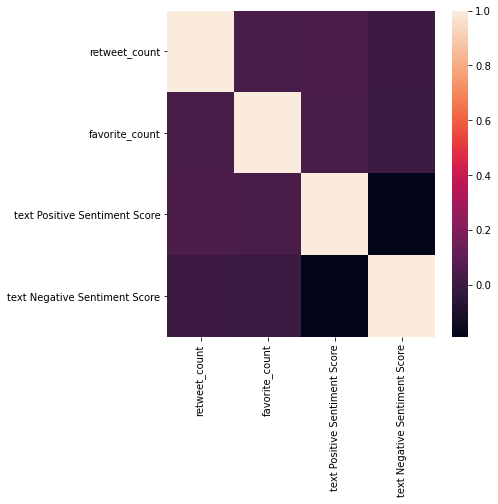

In [74]:
#correlation map
plt.figure(figsize= (6, 6))
sns.heatmap(features.corr())

In [75]:
 #Import english stop words

stopcorpus: typing.List = stopwords.words('english')

In [76]:
# Convert to lowercase, and remove stop words

def remove_links(text):
    # Remove any hyperlinks that may be in the text starting with http
    return re.sub(r"http\S+", "", text)

def style_text(text:str):
    # Convert to lowercase
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    # Remove all words as specified in a custom list of words
    return [item for item in text_data if item not in list_of_words_to_remove]

def collapse_list_to_string(string_list):
    # This is to join back together the text data into a single string
    return ' '.join(string_list)

def remove_apostrophes(text):
    # Remove any apostrophes as these are irrelavent in our word cloud
    text = text.replace("'", "")
    text = text.replace('"', "")
    text = text.replace('`', "")
    return text

def remove_others(text):
    
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Remove @mentions
    text = re.sub(r'#','',text) # Remove hashtag symbols
    text = re.sub(r'RT[\s]+','',text) # Remove retweets
    text = re.sub(r'Ukraine','',text) 
    text = re.sub(r'ukraine','',text) 
    text = re.sub(r'ukrainian','',text)
    text = re.sub(r'amp','',text)
    text = re.sub(r'rt','',text)
    text = re.sub(r'Russia','',text) 
    text = re.sub(r'russia','',text) 
    return text

In [77]:
tweet_sentiment['cleaned_text'] = tweet_sentiment.loc[:,'text'].astype(str).apply(remove_links)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(style_text)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(lambda x: remove_words(x.split(),stopcorpus))

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(collapse_list_to_string)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_apostrophes)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_others)

<ipython-input-77-2ade89cc017e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-2ade89cc017e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-2ade89cc017e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-2ade89c

In [78]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


tweet_sentiment['clean_lemmatized'] = tweet_sentiment['cleaned_text'].astype(str).apply(lemmatize_text)

tweet_sentiment['clean_lemmatized'] = tweet_sentiment['clean_lemmatized'].apply(collapse_list_to_string)

display(tweet_sentiment['clean_lemmatized'].head(5))

<ipython-input-78-3e2f8e3d0251>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-3e2f8e3d0251>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    __mag: vladimir putin turned annual wwii victory day holiday may 9 celebration n imperial aggressi…
1                                     4.5 mil ton grain blocked po world try figure new hunger upon it.…
2               lavrov saying italian tv doesn’t want zelensky give up, want cause resistance really ma…
3                           one difference putin’s barbaric operation &; syria syria basically unarmed.…
4                journo yuriy butusov: april 30, 🇷🇺 “wagner” militant attacked 🇺🇦 trench donbas, defeat…
Name: clean_lemmatized, dtype: object

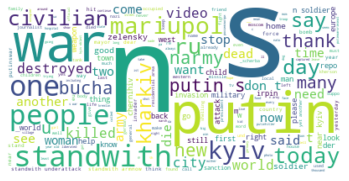

In [79]:
def plot_wordcloud(series,output_filename='wordcloud'):

    wordcloud = WordCloud(max_font_size=150, max_words=500, background_color="white").generate(' '.join(series.astype(str)))

    wordcloud.to_file(output_filename + '.png')

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

plot_wordcloud(tweet_sentiment['clean_lemmatized'],'overall-wordcloud')

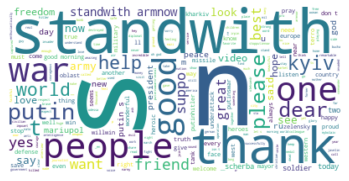

In [80]:
def plot_wordcloud_top_n(df,number_of_tweets,score_column,data_column,output_filename):
    sliced_df = df.nlargest(number_of_tweets,score_column)

    plot_wordcloud(sliced_df[data_column],output_filename)


plot_wordcloud_top_n(tweet_sentiment,500,'text Positive Sentiment Score','clean_lemmatized','positive-wordcloud')

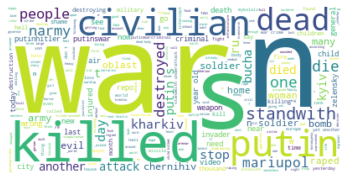

In [81]:
plot_wordcloud_top_n(tweet_sentiment,500,'text Negative Sentiment Score','clean_lemmatized','negative-wordcloud')

In [82]:
#retweets distribution over time
fig = px.line(olextweets, x="time", y= olextweets['retweet_count'])
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [83]:
df=olextweets[['time', 'retweet_count','text Positive Sentiment Score','text Negative Sentiment Score']]
pos=olextweets[['time', 'retweet_count','text Positive Sentiment Score']]
neg =olextweets[['time', 'retweet_count','text Negative Sentiment Score']]
df[(df['time']>='2022-03-01') & (df['time']<='2022-04-01')]

,time,retweet_count,text Positive Sentiment Score,text Negative Sentiment Score
1026,2022-03-31 23:55:55+00:00,695,0.250,0.000
1027,2022-03-31 23:48:13+00:00,561,0.000,0.134
1028,2022-03-31 21:16:33+00:00,412,0.000,0.000
1029,2022-03-31 20:43:25+00:00,7569,0.000,0.144
1030,2022-03-31 20:41:10+00:00,1051,0.000,0.000
...,...,...,...,...
3128,2022-03-01 07:10:05+00:00,3051,0.000,0.087
3129,2022-03-01 07:09:38+00:00,94,0.237,0.085
3130,2022-03-01 07:09:08+00:00,1144,0.000,0.394
3131,2022-03-01 07:02:59+00:00,353,0.494,0.000


In [84]:
#how retweets via sentiments are having an evolution over time
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['time'], y=pos['text Positive Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['time'], y=neg['text Negative Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [85]:

olextweets ["is_viral"] = olextweets .retweet_count.apply(
    lambda row: 1 if row >= olextweets .retweet_count.mean()  else 0)

print(olextweets .is_viral.value_counts())

0    2563
1     682
Name: is_viral, dtype: int64


In [86]:
olextweets ['tweet_length'] = olextweets .apply(lambda tweet: len(tweet['text']), axis=1)
olextweets ["followers_count"] = olextweets .apply(lambda tweet: tweet["followers_count"], axis=1)
olextweets ["friends_count"] = olextweets .apply(lambda tweet: tweet["following"], axis=1)

olextweets ["hashtag_count"] = olextweets .apply(lambda tweet: tweet.text.count("#"), axis=1)
olextweets ["link_count"] = olextweets .apply(lambda tweet: tweet.text.count("http"), axis=1)
olextweets ["word_count"] = olextweets .apply(lambda tweet: len(tweet.text.split()), axis=1)

def find_avg_word_length(str):
    #function to find average word length of a string
    sum = 0
    for i in range(0, len(str.split())):
        sum = sum + len(str.split()[i])
    avg = sum/len(str.split())
    return avg

olextweets ["avg_length_of_words"] = olextweets .text.apply(find_avg_word_length)

In [87]:


labels = olextweets [["is_viral"]]
features = olextweets [["tweet_length", "followers_count", "friends_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features = scale(features, axis=0)

features2 = olextweets [["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count"]]
scaled_features2 = scale(features2, axis=0)

features3 = olextweets [["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features3 = scale(features3, axis=0)

print(features.loc[0])
print(scaled_features[0])

tweet_length                        140
followers_count                  273256
friends_count                       972
text Positive Sentiment Score     0.124
text Negative Sentiment Score       0.0
Name: 0, dtype: object
[ 0.5655921   0.25628391 -0.25628391  0.50597469 -0.78648144]


In [88]:


train_data, test_data, train_labels, test_labels = train_test_split(scaled_features3, labels, 
                                                                    test_size = 0.2,
                                                                    random_state=1)

In [89]:


classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.7981510015408321

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

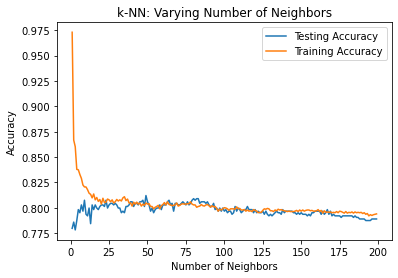

In [90]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 200)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
 # Setup a k-NN Classifier with k neighbors: knn
 knn = KNeighborsClassifier(n_neighbors=k)
 # Fit the classifier to the training data
 knn.fit(train_data, train_labels)
 
 #Compute accuracy on the training set
 train_accuracy[i] = knn.score(train_data, train_labels)
 #Compute accuracy on the testing set
 test_accuracy[i] = knn.score(test_data, test_labels)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [91]:
#lets find best_k

best_score = 0
best_k = 0

for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    if classifier.score(test_data, test_labels) > best_score:
        best_score = classifier.score(test_data, test_labels)
        best_k = k

print(best_k)
print(best_score)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

49
0.8120184899845917


In [94]:
olextweets.to_csv('olextweets')